Import packages

In [35]:
# TO USE FOR ENTIRE TEAM
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [36]:
# Processing the data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test
from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)
from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
from sklearn.svm import SVC 
# svc = SVC(kernel='linear')
from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)
from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report 
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)


from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import NearMiss 

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [37]:
# Pull in our original data and a copy for the base model
df = pd.read_csv('online_shoppers_intention.csv', na_values=r'-')
df_base = df.copy()

In [38]:
# Pipeline - Initial Imputation of Categorical Features:

## Replace the VisitorType 'Other' with the variable's mode, namely: 'Returning_Visitor'
df['VisitorType'] = df['VisitorType'].replace('Other','Returning_Visitor')
df.groupby('VisitorType').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
VisitorType,,,,,,,,,,,,,,,,,
New_Visitor,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694,1694
Returning_Visitor,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636,10636


In [39]:
# Initial Log Transformation Continuous Features

impute1_list =['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']

# Impute Zeros before doing the log
for column in impute1_list:
    df[column] = df[column] + 1

display(df.sample(20))

# df['PageValues'] = df['PageValues'] + 1

df['PageValues_Log'] = np.log(df['PageValues'])

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9105,1,1.000000,1,1.000000,14,1246.250000,1.000000,1.015385,1.000000,0.0,Dec,2,2,1,2,Returning_Visitor,True,False
8655,18,347.709640,4,208.250000,293,8283.214508,1.000977,1.005670,14.918324,0.0,Nov,2,2,1,2,Returning_Visitor,True,False
11639,4,92.500000,5,334.833333,133,3042.676452,1.011765,1.030933,1.000000,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
4043,2,5.000000,1,1.000000,25,958.900000,1.025000,1.032639,23.744583,0.4,May,3,2,6,13,Returning_Visitor,False,True
5974,2,6.000000,1,1.000000,41,2732.500000,1.000000,1.012358,1.000000,0.0,Jul,2,10,2,2,Returning_Visitor,True,False
5468,18,181.133333,2,81.600000,181,6513.010952,1.002646,1.012249,1.000000,0.0,Sep,2,2,1,3,Returning_Visitor,False,False
4365,1,1.000000,1,1.000000,2,1.000000,1.200000,1.200000,1.000000,0.0,May,3,3,1,1,Returning_Visitor,False,False
11603,7,173.125000,1,1.000000,123,2768.366071,1.000533,1.004071,40.752500,0.0,Dec,4,1,1,2,Returning_Visitor,False,False
3068,3,34.000000,1,1.000000,23,461.666667,1.000000,1.025000,1.000000,0.6,May,3,2,3,1,Returning_Visitor,False,False
1956,2,39.000000,1,1.000000,6,132.000000,1.033333,1.013333,1.000000,0.0,Mar,1,2,1,9,New_Visitor,True,False


In [40]:
def holiday_bin_func(month) :
    if month == 'May':
        return int(1)
    elif month == 'Feb':
        return int(1)
    else:
        return int(0)
    
df['Holiday_Bin'] = df['Month'].apply(holiday_bin_func)

##Reduce months to the top 4 in which there are transactions and "other"
def month_bin_func(month) :
    if month == 'May':
        return int(5)
    elif month == 'Nov':
        return int(11)
    elif month == 'Mar':
        return int(3)
    elif month == 'Dec':
        return int(12)
    else:
        return int(0)
    
df['Month_Bin'] = df['Month'].apply(month_bin_func)


##Encode month names to numerical representations

def month_func(month) :
    if month == 'Jan':
        return int(1)
    elif month == 'Feb':
        return int(2)
    elif month == 'Mar':
        return int(3)
    elif month == 'Apr':
        return int(4)
    elif month == 'May':
        return int(5)
    elif month == 'June':
        return int(6)
    elif month == 'Jul':
        return int(7)
    elif month == 'Aug':
        return int(8)
    elif month == 'Sep':
        return int(9)
    elif month == 'Oct':
        return int(10)
    elif month == 'Nov':
        return int(11)
    elif month == 'Dec':
        return int(12)

df['Month'] = df['Month'].apply(month_func)

def month_quarterly_func(month) :
    if month <= 3:
        return int(1)
    elif month >= 4 and month <= 6:
        return int(2)
    elif month >= 7 and month <= 9:
        return int(3)
    elif month >= 10 and month <= 12:
        return int(4)

df['Quarter'] = df['Month'].apply(month_quarterly_func)

In [41]:
# Encode Revenue before splitting the data to allow for modeling
from sklearn.preprocessing import LabelEncoder #Package added from sklearn so it would run
enc = LabelEncoder()

df['VisitorType'] = enc.fit_transform(df['VisitorType'])
df['Weekend'] = enc.fit_transform(df['Weekend'])
df['Revenue'] = enc.fit_transform(df['Revenue'])

In [42]:
#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_Exit'] = df['Administrative'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_Bounce'] = df['Administrative'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Exit'] = df['Administrative_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_Bounce'] = df['Administrative_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Info_per_Exit'] = df['Informational'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_per_Bounce'] = df['Informational'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Exit'] = df['Informational_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Info_dur_per_Bounce'] = df['Informational_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Product_per_Exit'] = df['ProductRelated'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_per_Bounce'] = df['ProductRelated'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Exit'] = df['ProductRelated_Duration'] / df['ExitRates'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Product_dur_per_Bounce'] = df['ProductRelated_Duration'] / df['BounceRates'] # average the denominator 'Bounce_Exit_Rate_Avg'

#Create 'Bounce_Exit_Rate_Avg' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_Exit_Rate_Avg'] = (df['BounceRates'] + df['ExitRates'])/2
df['Bounce_Exit_Rate_WeightedAvg'] = ((df['BounceRates']*.6) + (df['ExitRates']*.4))
df['Bounce_Exit_Rate_Avg_PageVales'] = (df['Bounce_Exit_Rate_Avg'] / df['PageValues']) # add a chart to compare the trends and distributions

df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Administrative_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['Informational_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_per_bounce_exit_avg'] = df['Administrative'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'
df['Admin_dur_per_bounce_exit_avg'] = df['ProductRelated_Duration'] / df['Bounce_Exit_Rate_Avg'] # average the denominator 'Bounce_Exit_Rate_Avg'


df['Bounce_Exit_Rate_lin_combo2'] = ((df['ExitRates']*1) + (df['BounceRates']*2))
df['Bounce_Exit_Rate_lin_combo3'] = ((df['ExitRates']*1) + (df['BounceRates']*3))
df['Bounce_Exit_Rate_lin_combo4'] = ((df['ExitRates']*1) + (df['BounceRates']*4))
df['Bounce_Exit_Rate_lin_combo5'] = ((df['ExitRates']*1) + (df['BounceRates']*5))

df['Bounce_Exit_Rate_lin_combo7'] = ((df['BounceRates']*1) + (df['ExitRates']*2))
df['Bounce_Exit_Rate_lin_combo8'] = ((df['BounceRates']*1) + (df['ExitRates']*3))
df['Bounce_Exit_Rate_lin_combo9'] = ((df['BounceRates']*1) + (df['ExitRates']*4))
df['Bounce_Exit_Rate_lin_combo10'] = ((df['BounceRates']*1) + (df['ExitRates']*5))

df['Bounce_Exit_Rate_lin_combo11'] = ((df['BounceRates']*2) + (df['ExitRates']*2))
df['Bounce_Exit_Rate_lin_combo12'] = ((df['BounceRates']*3) + (df['ExitRates']*3))
df['Bounce_Exit_Rate_lin_combo13'] = ((df['BounceRates']*4) + (df['ExitRates']*4))
df['Bounce_Exit_Rate_lin_combo14'] = ((df['BounceRates']*5) + (df['ExitRates']*5))


#Create 'Bounce_per_Exit_Rate' to enable us to retain two highly correlated variables (i.e., 'BounceRates' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_Exit_Rate'] = df['BounceRates'] / df['ExitRates']

#Create 'Total_Duration' and 'Total_Duration_Avg' to enable us to assess total and average duration, respectively.
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
df['Total_Duration_Avg'] = (df['Total_Duration'])/3
df['Admin_Duration_percent_TotalDuration'] = df['Administrative_Duration'] / df['Total_Duration']
df['Info_Duration_percent_TotalDuration'] = df['Informational_Duration'] / df['Total_Duration']
df['Product_Duration_percent_TotalDuration'] = df['ProductRelated_Duration'] / df['Total_Duration']
df['TotalDuration_per_PageValues'] = df['Total_Duration'] / df['PageValues']
df['TotalDuration_per_ExitRates'] = df['Total_Duration'] / df['ExitRates']
df['TotalDuration_per_BounceRates'] = df['Total_Duration'] / df['BounceRates']
df['TotalDuration_per_BounceExit_avg'] = df['Total_Duration'] / df['Bounce_Exit_Rate_Avg']
df['TotalDuration_per_BounceExit_lin3'] = df['Total_Duration'] / df['Bounce_Exit_Rate_lin_combo3']
df['TotalDuration_per_BounceExit_lin8'] = df['Total_Duration'] / df['Bounce_Exit_Rate_lin_combo8']
df['TotalDuration_per_BounceExit_lin12'] = df['Total_Duration'] / df['Bounce_Exit_Rate_lin_combo12']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Admin_per_PageValues'] = df['Administrative'] / df['PageValues']
df['AdminDuration_per_PageValues'] = df['Administrative_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Informational_per_PageValues'] = df['Informational'] / df['PageValues']
df['Info_Duration_per_PageValues'] = df['Informational_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['ProductRelated_per_PageValues'] = df['ProductRelated'] / df['PageValues']
df['Product_Duration_per_PageValues'] = df['ProductRelated_Duration'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Exit_per_PageValues'] = df['ExitRates'] / df['PageValues']

#Create 'Admin_per_Exit' to enable us to retain two highly correlated variables (i.e., 'Administrative' and 'ExitRates') since both are highly correlated with the target
df['Bounce_per_PageValues'] = df['BounceRates'] / df['PageValues']

# calcualted_cols = ['Admin_per_Exit', 'Admin_per_Bounce', 'Bounce_Exit_Rate_Avg', 'Bounce_Exit_Rate_WeightedAvg', 'Bounce_per_Exit_Rate', 'Total_Duration','Total_Duration_Avg','Admin_Duration_percent_TotalDuration',\
#            'Info_Duration_percent_TotalDuration','Product_Duration_percent_TotalDuration','TotalDuration_per_PageValues', 'Admin_per_PageValues', 'AdminDuration_per_PageValues', 'Informational_per_PageValues',\
#            'Info_Duration_per_PageValues','ProductRelated_per_PageValues', 'Product_Duration_per_PageValues', 'Exit_per_PageValues', 'Bounce_per_PageValues','Revenue']

# display(df[calcualted_cols].sample(20))

In [43]:
# Correlation Heatmap for the data
df_calculated = df.iloc[:,-54:]
y = df.loc[:,'Revenue']

In [44]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'PageValues_Log', 'Holiday_Bin', 'Month_Bin',
       'Quarter', 'Admin_per_Exit', 'Admin_per_Bounce', 'Admin_dur_per_Exit',
       'Admin_dur_per_Bounce', 'Info_per_Exit', 'Info_per_Bounce',
       'Info_dur_per_Exit', 'Info_dur_per_Bounce', 'Product_per_Exit',
       'Product_per_Bounce', 'Product_dur_per_Exit', 'Product_dur_per_Bounce',
       'Bounce_Exit_Rate_Avg', 'Bounce_Exit_Rate_WeightedAvg',
       'Bounce_Exit_Rate_Avg_PageVales', 'Admin_per_bounce_exit_avg',
       'Admin_dur_per_bounce_exit_avg', 'Bounce_Exit_Rate_lin_combo2',
       'Bounce_Exit_Rate_lin_combo3', 'Bounce_Exit_Rate_lin_combo4',
       'Bounce_Exit_Rate_lin_combo5', 'Bounce_Exit_Rate_lin_

In [45]:
x_cols =['SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'PageValues_Log', 'Holiday_Bin', 'Month_Bin',
       'Quarter', 'Admin_per_Exit', 'Admin_per_Bounce', 'Admin_dur_per_Exit',
       'Admin_dur_per_Bounce', 'Info_per_Exit', 'Info_per_Bounce',
       'Info_dur_per_Exit', 'Info_dur_per_Bounce', 'Product_per_Exit',
       'Product_per_Bounce', 'Product_dur_per_Exit', 'Product_dur_per_Bounce',
       'Bounce_Exit_Rate_Avg', 'Bounce_Exit_Rate_WeightedAvg',
       'Bounce_Exit_Rate_Avg_PageVales', 'Admin_per_bounce_exit_avg',
       'Admin_dur_per_bounce_exit_avg', 'Bounce_Exit_Rate_lin_combo2',
       'Bounce_Exit_Rate_lin_combo3', 'Bounce_Exit_Rate_lin_combo4',
       'Bounce_Exit_Rate_lin_combo5', 'Bounce_Exit_Rate_lin_combo7',
       'Bounce_Exit_Rate_lin_combo8', 'Bounce_Exit_Rate_lin_combo9',
       'Bounce_Exit_Rate_lin_combo10', 'Bounce_Exit_Rate_lin_combo11',
       'Bounce_Exit_Rate_lin_combo12', 'Bounce_Exit_Rate_lin_combo13',
       'Bounce_Exit_Rate_lin_combo14', 'Bounce_per_Exit_Rate',
       'Total_Duration', 'Total_Duration_Avg',
       'Admin_Duration_percent_TotalDuration',
       'Info_Duration_percent_TotalDuration',
       'Product_Duration_percent_TotalDuration',
       'TotalDuration_per_PageValues', 'TotalDuration_per_ExitRates',
       'TotalDuration_per_BounceRates', 'TotalDuration_per_BounceExit_avg',
       'TotalDuration_per_BounceExit_lin3',
       'TotalDuration_per_BounceExit_lin8',
       'TotalDuration_per_BounceExit_lin12', 'Admin_per_PageValues',
       'AdminDuration_per_PageValues', 'Informational_per_PageValues',
       'Info_Duration_per_PageValues', 'ProductRelated_per_PageValues',
       'Product_Duration_per_PageValues', 'Exit_per_PageValues',
       'Bounce_per_PageValues']

In [46]:
Calculated_Corr_df = pd.DataFrame(df_calculated.corrwith(y,method='spearman'))

In [47]:
Calculated_Corr_df.iloc[:,0].sort_values()

Informational_per_PageValues             -0.488708
Bounce_per_PageValues                    -0.477998
Exit_per_PageValues                      -0.476278
Bounce_Exit_Rate_Avg_PageVales           -0.475882
Admin_per_PageValues                     -0.392895
ProductRelated_per_PageValues            -0.320409
Info_Duration_per_PageValues             -0.294618
Bounce_Exit_Rate_lin_combo10             -0.254663
Bounce_Exit_Rate_lin_combo9              -0.254569
Bounce_Exit_Rate_lin_combo8              -0.254409
Bounce_Exit_Rate_lin_combo7              -0.253711
Bounce_Exit_Rate_lin_combo12             -0.250304
Bounce_Exit_Rate_lin_combo14             -0.250287
Bounce_Exit_Rate_lin_combo11             -0.250266
Bounce_Exit_Rate_Avg                     -0.250266
Bounce_Exit_Rate_lin_combo13             -0.250266
Bounce_Exit_Rate_WeightedAvg             -0.246379
Bounce_Exit_Rate_lin_combo2              -0.242538
Bounce_Exit_Rate_lin_combo3              -0.235294
TotalDuration_per_PageValues   

In [48]:
df_calculated.max()

PageValues_Log                                5.893752
Holiday_Bin                                   1.000000
Month_Bin                                    12.000000
Quarter                                       4.000000
Admin_per_Exit                               27.740709
Admin_per_Bounce                             27.941341
Admin_dur_per_Exit                         3308.110895
Admin_dur_per_Bounce                       3397.153196
Info_per_Exit                                24.620077
Info_per_Bounce                              24.879303
Info_dur_per_Exit                          2481.630510
Info_dur_per_Bounce                        2548.426967
Product_per_Exit                            695.270969
Product_per_Bounce                          702.591528
Product_dur_per_Exit                      62250.110747
Product_dur_per_Bounce                    63925.657074
Bounce_Exit_Rate_Avg                          1.200000
Bounce_Exit_Rate_WeightedAvg                  1.200000
Bounce_Exi

In [49]:
X = df[x_cols]

In [50]:
from sklearn.preprocessing import quantile_transform
transformed_qt = quantile_transform(X,random_state=0,copy=True)
transformed_qt_df = pd.DataFrame(transformed_qt,columns = x_cols)
X[x_cols] = transformed_qt_df[x_cols]

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.com/v3/__http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html*returning-a-view-versus-a-copy*5Cn__;IyU!!KIFmrYtlezdzESbnm_I!UCnvV89lnf4zyYniQ1tmp0cEqfro80T-cjcfwd7vRwyp_8aShQmgOyEKh8XH9GthAmgdQtStAxStoyk$   self[k1] = value[k2]


In [51]:
# process the attributes that have a range outside of zero to one (0 - 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scale = scaler.fit(X)
scaled = scaler.transform(X)
scaled_df = pd.DataFrame(scaled,columns = x_cols)
X_scaled = scaled_df
# X[scale_cols] = scaled_df[scale_cols]

In [52]:
y = df.loc[:,'Revenue']

In [53]:
# resplit based on additional data prep completed post initial split
from sklearn.model_selection import train_test_split #Import train_test_split from sklearn so it will run
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.3,random_state=500) 

#### Feature Selection: Wrapper Forward Selection

In [54]:
# https://urldefense.com/v3/__https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f*5Cn__;JQ!!KIFmrYtlezdzESbnm_I!UCnvV89lnf4zyYniQ1tmp0cEqfro80T-cjcfwd7vRwyp_8aShQmgOyEKh8XH9GthAmgdQtSteySiEIg$ 
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(list(initial_features))>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [55]:
best_features = forward_selection(X_train, y_train, significance_level=0.05)

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [56]:
best_features

['PageValues_Log',
 'VisitorType',
 'Quarter',
 'AdminDuration_per_PageValues',
 'Admin_dur_per_Exit',
 'Month',
 'Holiday_Bin',
 'Info_Duration_per_PageValues',
 'Informational_per_PageValues',
 'ProductRelated_per_PageValues',
 'Bounce_Exit_Rate_lin_combo12',
 'Bounce_Exit_Rate_Avg_PageVales',
 'Bounce_per_PageValues',
 'Info_dur_per_Bounce',
 'Bounce_per_Exit_Rate',
 'Info_per_Exit',
 'Month_Bin',
 'Admin_per_PageValues',
 'Admin_per_bounce_exit_avg',
 'Info_per_Bounce',
 'Info_dur_per_Exit',
 'Exit_per_PageValues']

#### Feature Selection: Lasso 

In [57]:
# https://urldefense.com/v3/__https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784*5Cn__;JQ!!KIFmrYtlezdzESbnm_I!UCnvV89lnf4zyYniQ1tmp0cEqfro80T-cjcfwd7vRwyp_8aShQmgOyEKh8XH9GthAmgdQtStNrwHz_A$ 
from sklearn.linear_model import LassoCV

regr = LassoCV(cv=5, random_state=101,n_jobs =10 )
regr.fit(X_train, y_train)
print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_test, y_test))
model_coef = pd.Series(regr.coef_, index = list(X.columns[:]))
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0))) 

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12427598481065161, tolerance: 0.09315640839971004
  tol, rng, random, positive)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.48856734204645136, tolerance: 0.09315640839971004
  tol, rng, random, positive)


LassoCV Best Alpha Scored:  8.40786380931401e-05
LassoCV Model Accuracy:  0.4237610039534939
Variables Eliminated:  28
Variables Kept:  34


Text(0.5, 1.0, 'Most Important Features Identified using Lasso (!0)')

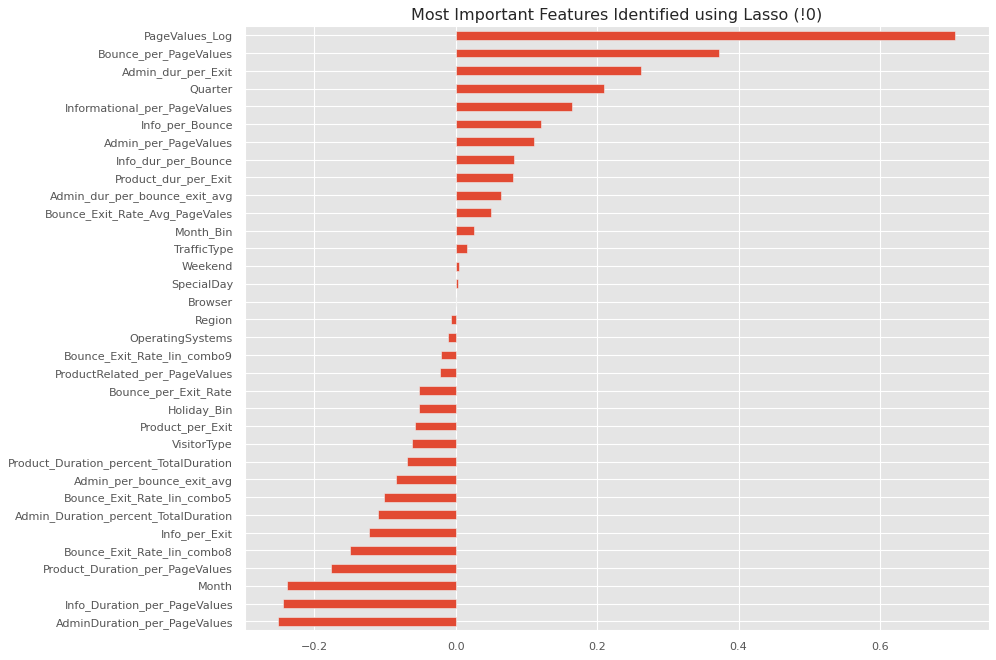

In [58]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

top_coef = model_coef.sort_values() # possible sort by index
top_coef[top_coef != 0].plot(kind = "barh")
plt.title("Most Important Features Identified using Lasso (!0)")

In [59]:
top_coef_df =pd.DataFrame(top_coef)
lasso_best =top_coef_df.tail(15).index.tolist()

In [60]:
X_train, X_test =  X_train.loc[:,lasso_best], X_test.loc[:,lasso_best]

# Part IV: Data Analysis/Modeling <a name="part4"></a>

## A. Naive Bayes Model (NB)
>   <b> Accuracy: </b> 87%
<br><b> AUC: </b> 87%
<br><b> Next Steps: </b> Additional parameter tuning

###0. Step 0: Import Needed Packages

In [61]:
# import the metrics class
from sklearn import metrics
# from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# import other required modules for confusion matrices
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [62]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

In [63]:
# Code for feature selection using scikit-learn

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,max_depth=2, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

4     0.222999
10    0.207473
14    0.184672
13    0.160492
8     0.128677
12    0.025110
6     0.023235
9     0.014826
5     0.014552
7     0.009301
3     0.004429
11    0.004233
2     0.000000
1     0.000000
0     0.000000
dtype: float64

###1. Step 1: Specify the Model

###2. Steps 2-4: Generate Test Data, Build the Models & Assess the Models for y2

y Accuracy: 0.874831035414977

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3158
           1       0.55      0.81      0.65       541

    accuracy                           0.87      3699
   macro avg       0.76      0.85      0.79      3699
weighted avg       0.90      0.87      0.88      3699



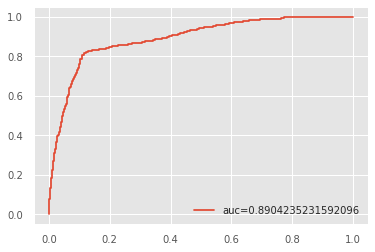

Text(0.5, 257.44, 'Predicted label')

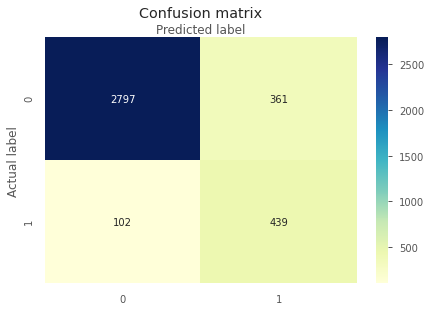

In [64]:
#Train the model using the training sets - for y2 (Sale)
gnb.fit(X_train, y_train)

#Predict the response for test dataset for y2
y_NB_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
# Accuracy for y2
print("y Accuracy:",metrics.accuracy_score(y_test, y_NB_pred))
print("")

#Can use classification report to assess model adequacy, too
class_names=[0,1] # name  of classes
print(metrics.classification_report(y_test, y_NB_pred, labels=class_names))

#AUC for y
y_NB_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_NB_pred_proba)
auc = metrics.roc_auc_score(y_test, y_NB_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_NB_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [65]:
#Conclusion - With accuracy of 81% for each y1 and y2, the Naive Bayes model is superior to the base model which had an accuracy of 71% for each target.
#However, there is still room for improvement.

In [66]:
# # PARAMETER OPTIMIZATION CODE USING GRID SEARCH = N/A
# #Per: https://urldefense.com/v3/__https://stats.stackexchange.com/questions/299842/why-grid-search-is-not-performed-for-naive-bayes-classifier:*5Cn__;JQ!!KIFmrYtlezdzESbnm_I!UCnvV89lnf4zyYniQ1tmp0cEqfro80T-cjcfwd7vRwyp_8aShQmgOyEKh8XH9GthAmgdQtStx_anvLQ$ # #"There isn't a hyper-parameter to tune, so you have nothing to grid search over."

## B. Decision Tree Model (DT)
>   <b> Accuracy: </b> 85%
<br><b> AUC: </b> 69%
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model

In [67]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#### Build the Model

In [68]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_DT_pred = clf.predict(X_test)

In [69]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred))

Accuracy: 0.8572587185725872


#### Assess the Model

In [70]:
# Evaluating the Classification Report
print(metrics.classification_report(y_test, y_DT_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3158
           1       0.51      0.53      0.52       541

    accuracy                           0.86      3699
   macro avg       0.72      0.72      0.72      3699
weighted avg       0.86      0.86      0.86      3699



In [71]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_DT_pred))

[[2883  275]
 [ 253  288]]


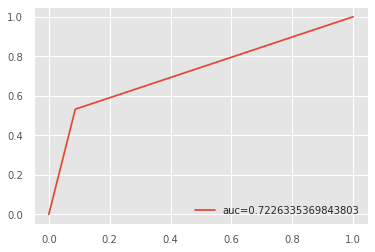

Text(0.5, 257.44, 'Predicted label')

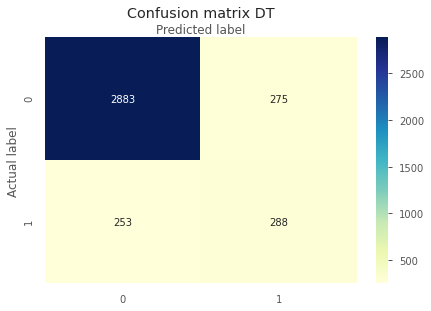

In [72]:
#AUC for y
y_DT_pred_proba = clf.predict_proba(X_test)[::,1]
fpr_DT, tpr_DT, _ = metrics.roc_curve(y_test,  y_DT_pred_proba)
auc_DT = metrics.roc_auc_score(y_test, y_DT_pred_proba)
plt.plot(fpr_DT,tpr_DT,label="auc="+str(auc_DT))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_DT = metrics.confusion_matrix(y_test, y_DT_pred)
cnf_matrix_DT
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

85.45% is much better than the baseline model of 70%

#### *** Attempted Model Optimization - Not 100% if I optimized these correctly

##### y2 (Sale)

In [73]:
# Trying to optimize Decision Tree Model by adding in the parameters "entropy" (information gain selection measure) and "max depth=3"
# # Did this in order to reduce to complexity of the Decision Tree, in hopes that it will yield better results
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion = "entropy", max_depth=3)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_train,y_train)

#Predict the response for test dataset
y_DT_pred2 = clf2.predict(X_test)

In [74]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_DT_pred2))

Accuracy: 0.8948364422816978


In [75]:
# Evaluating the Classification Report
print(metrics.classification_report(y_test, y_DT_pred2))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3158
           1       0.64      0.65      0.64       541

    accuracy                           0.89      3699
   macro avg       0.79      0.79      0.79      3699
weighted avg       0.90      0.89      0.90      3699



[[2958  200]
 [ 189  352]]


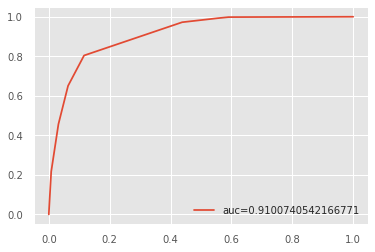

Text(0.5, 257.44, 'Predicted label')

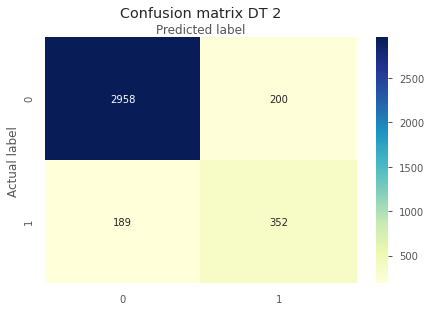

In [76]:
# Evaluating the Confusion Matrix
print(metrics.confusion_matrix(y_test, y_DT_pred2))

#AUC for y
y_DT_pred_proba2 = clf2.predict_proba(X_test)[::,1]
fpr_DT2, tpr_DT2, _ = metrics.roc_curve(y_test,  y_DT_pred_proba2)
auc_DT2 = metrics.roc_auc_score(y_test, y_DT_pred_proba2)
plt.plot(fpr_DT2,tpr_DT2,label="auc="+str(auc_DT2))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_DT2 = metrics.confusion_matrix(y_test, y_DT_pred2)
cnf_matrix_DT2
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_DT2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix DT 2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### Not sure if the optimized model is overfitting, but 89.53% accuracy is better than the base Decision Tree Models

In [77]:
# # Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [78]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

In [80]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH:

#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV

#Define the grid
criterion=['gini','entropy']
splitter=['best','random']
max_depth=[3,4,5]
param_grid = dict(criterion=criterion, splitter=splitter,max_depth=max_depth)

#Run the grid search
#import time

dt = DecisionTreeClassifier()
grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv = 10, n_jobs=-1)

#start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#The below is for execution time - not important for us right now, so commented out
# print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.889457 using {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}


## C. Random Forest Model (RF)
>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 87%
<br><b> Next Steps: </b> Additional parameter tuning

#### Specify the Model

In [81]:
# Building a Classifier
#Import scikit-learn dataset library
from sklearn import datasets

#### Build Model for y2 (Sale)

In [82]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

y_RF_pred = rfc.predict(X_test)

In [83]:
# Evaluation of the Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_RF_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.64      0.57      0.60       541

    accuracy                           0.89      3699
   macro avg       0.78      0.76      0.77      3699
weighted avg       0.89      0.89      0.89      3699



[[2985  173]
 [ 232  309]]


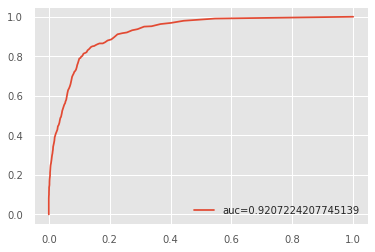

Text(0.5, 257.44, 'Predicted label')

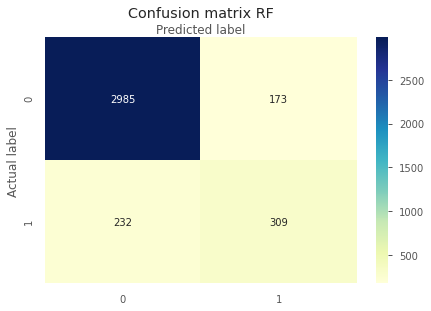

In [84]:
# Evaluation of the Confusion Matrix
print(confusion_matrix(y_test, y_RF_pred))

#AUC for y
y_RF_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test,  y_RF_pred_proba)
auc_RF = metrics.roc_auc_score(y_test, y_RF_pred_proba)
plt.plot(fpr_RF,tpr_RF,label="auc="+str(auc_RF))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_RF_pred)
cnf_matrix_RF
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_RF), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix RF', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

##### 90% accuracy for both Random Forest Models, so far better than the Decision Tree Models

In [85]:
# # Attempt on the feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [86]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

In [87]:
# # # PARAMETER OPTIMIZATION CODE USING GRID SEARCH - TAKES FOREVER...consider not running!: 
# # # Reference: https://urldefense.com/v3/__https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74*5Cn__;JQ!!KIFmrYtlezdzESbnm_I!UCnvV89lnf4zyYniQ1tmp0cEqfro80T-cjcfwd7vRwyp_8aShQmgOyEKh8XH9GthAmgdQtSt5GubdFc$ 
# #Add in GridSearchCV
# from sklearn.model_selection import GridSearchCV

### Define the grid
### dual=[True,False]
### max_iter=[100,110,120,130,140]
### param_grid = dict(dual=dual,max_iter=max_iter)
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the parameter grid
# param_grid = dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth,
#                min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap)

# #Run the grid search
# #import time

# rf = RandomForestClassifier()
# grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv = 10, n_jobs=-1)

# #start_time = time.time()
# grid_result = grid.fit(X, y)
# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# # #The below is for execution time - not important for us right now, so commented out
# # # print("Execution time: " + str((time.time() - start_time)) + ' ms')


KeyboardInterrupt: 

## D. Support Vector Machines (SVM) Classification Model (SVC)
>   <b> Accuracy: </b> 88%
<br><b> AUC: </b> 85%
<br><b> Next Steps: </b> SVC ensemble classifiers 

In [149]:
###1. Step 1: Specify the Model
from sklearn import svm
svc = svm.SVC(kernel='rbf',cache_size=7000,gamma= 'auto', C=5, probability =True, degree = 5) # gamma= 0.001 , kernel='poly', 'rbf',‘linear’

In [150]:
###2. Step 2: Generate Test Data
# X_train_svc, X_test_svc, y1_train_svc, y1_test_svc, y2_train_svc, y2_test_svc = train_test_split(X, y1,y2, test_size=0.3,random_state=1000) 
# X_train, X_test, y1_Models_train, y1_Models_test, y2_Models_train, y2_Models_test
#Standard Scale the data to allow for better SVC model performance
# scaler = StandardScaler().fit(X_train) 
# standardized_X_svc = scaler.transform(X_train) 
# standardized_X_test_svc = scaler.transform(X_test)

In [151]:
###3. Step 3: Build the Model
#Train the model using the training sets
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svc = svc.predict(X_test)

Accuracy_svc: 0.8891592322249257
[[2909  249]
 [ 161  380]]


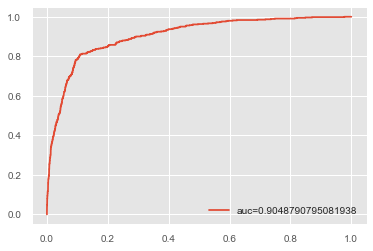


              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3158
           1       0.60      0.70      0.65       541

    accuracy                           0.89      3699
   macro avg       0.78      0.81      0.79      3699
weighted avg       0.90      0.89      0.89      3699

Accuracy_svc: 0.8891592322249257


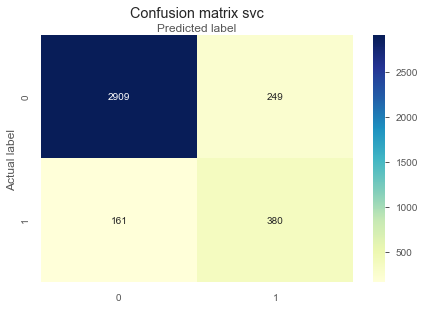

In [152]:
###4. Step 4: Assess the Model
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))
cnf_matrix_svc = metrics.confusion_matrix(y_test, y_pred_svc)

print(cnf_matrix_svc)


#AUC for y1
y_SVM_pred_proba = svc.predict_proba(X_test)[::,1]
fpr_SVM, tpr_SVM, _ = metrics.roc_curve(y_test,  y_SVM_pred_proba)
auc_SVM = metrics.roc_auc_score(y_test, y_SVM_pred_proba)
plt.plot(fpr_SVM,tpr_SVM,label="auc="+str(auc_SVM))
plt.legend(loc=4)
plt.show()
print("")

class_names_svc=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_svc = np.arange(len(class_names_svc))
plt.xticks(tick_marks_svc, class_names_svc)
plt.yticks(tick_marks_svc, class_names_svc)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svc), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix svc', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_svc))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_svc))

In [153]:
# # Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [ ]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

In [ ]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 
# Per SVM Tutorial:
### Tuning Hyperparameters
#- Kernel: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.
#- Regularization: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.
#- Gamma: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.
#DWM Note from video: [Note tweak Gamma: only try if the rbf kernel works; only tweak the "d" if the polynomial kernel works]
#DWN Note from video: [Be careful with Gamma and d - higher values will cause model to overfit]

# #Add in GridSearchCV
# from sklearn.model_selection import GridSearchCV

# #Define the grid
# kernel =['linear','poly','rbf']
# C_penalty=[[1, .75, .5]] #From tutorial - C is for how much to "penalize" classifier; default is 1 and it can go down to 0
# param_grid = dict(kernel=kernel,C_penalty=C_penalty)

# #Run the grid search
# import time

# SVM = svm.SVC(cache_size=7000, gamma= 'auto', probability =True, degree = 5)
# grid = GridSearchCV(estimator=SVM, param_grid=param_grid, cv = 10, n_jobs=-1)

# start_time = time.time()
# grid_result = grid.fit(X, y)
# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# #The below is for execution time - not important for us right now, so commented out
# # print("Execution time: " + str((time.time() - start_time)) + ' ms')

## E. XGBoost Model (XGB)
>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 89%
<br><b> RMSE: </b> .32
<br><b> Next Steps: </b> Additional parameter tuning


###0. Step 0: Import Needed Packages

In [155]:
#Import Needed Packages
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

#Do preliminary work


###1. Step 1: Specify the Model

In [156]:
#Instantiate an XGBoost Classifer Model - for y1 (No_Sale)
XGB_class = xgb.XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)


###2. Steps 2-4: Generate Test Data, Build the Models & Assess the Models for y2 (Sale)

In [157]:
#Put Data into structure for XGBoost- for y2 (Sale) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

#Train the model using the training sets for y1
XGB_class.fit(X_train, y_train)

#Predict the response for test dataset for y1
y_XGB_pred = XGB_class.predict(X_test)

#Calculate RMSE for y2
rmse_XGB = np.sqrt(mean_squared_error(y_test, y_XGB_pred))
print("XGBoost's RMSE for y2 is: %f" % (rmse_XGB))

#Create error ratio to evaluate results for y2
target_range_XGB = y.max() - y.min()
print("XGB target range is: %f" % (target_range_XGB))
error_ratio_XGB = rmse_XGB/target_range_XGB
print("XGBoost's Error Ratio for y2 is: %f" % (error_ratio_XGB))

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\Tradeskool\.conda\envs\TYTO\lib\site-packages\xgboost\core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



XGBoost's RMSE for y2 is: 0.312400
XGB target range is: 1.000000
XGBoost's Error Ratio for y2 is: 0.312400


In [158]:
#ISSUE WITH THE ABOVE - HOW COME THE TARGET RANGE IS 1? DOES IT HAVE TO DO WITH 0/1 STATUS OF TARGET VARIABLE???

y Accuracy: 0.9024060556907272

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3158
           1       0.69      0.61      0.65       541

    accuracy                           0.90      3699
   macro avg       0.81      0.78      0.79      3699
weighted avg       0.90      0.90      0.90      3699



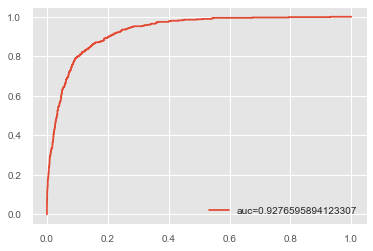

Text(0.5, 257.44, 'Predicted label')

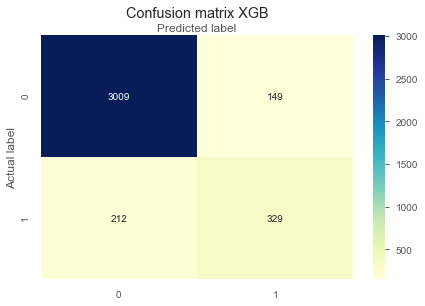

In [159]:
# Model Accuracy, how often is the classifier correct?
# Accuracy for y2
print("y Accuracy:",metrics.accuracy_score(y_test, y_XGB_pred))
print("")


#Can use classification report to assess model adequacy, too
print(metrics.classification_report(y_test, y_XGB_pred, labels=class_names))

#AUC for y1
y_XGB_pred_proba = XGB_class.predict_proba(X_test)[::,1]
fpr_XGB, tpr_XGB, _ = metrics.roc_curve(y_test,  y_XGB_pred_proba)
auc_XGB = metrics.roc_auc_score(y_test, y_XGB_pred_proba)
plt.plot(fpr_XGB,tpr_XGB,label="auc="+str(auc_XGB))
plt.legend(loc=4)
plt.show()
print("")

#Print Confusion Matrix
cnf_matrix_XGB = metrics.confusion_matrix(y_test, y_XGB_pred)
cnf_matrix_XGB
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_XGB), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix XGB', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [160]:
# # Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [161]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

In [ ]:
# # PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 

# #Add in GridSearchCV
# from sklearn.model_selection import GridSearchCV

# #Define the grid
# learning_rate=[.1,0.5,1]
# max_depth=[1, 3, 5]
# param_grid = dict(learning_rate=learning_rate,max_depth=max_depth)

# #Run the grid search
# import time

## XGB = xgb.XGBClassifier(reg_alpha = 10, reg_lambda = 10, n_estimators = 100) #in case we want to use later
#  XGB = xgb.XGBClassifier(n_estimators = 100)
# grid = GridSearchCV(estimator=XGB, param_grid=param_grid, cv = 10, n_jobs=-1)

# start_time = time.time()
# grid_result = grid.fit(X, y)
# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# #The below is for execution time - not important for us right now, so commented out
# # print("Execution time: " + str((time.time() - start_time)) + ' ms')


#INFO/CODE FROM TUTORIAL
# learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
# max_depth: determines how deeply each tree is allowed to grow during any boosting round.
# subsample: percentage of samples used per tree. Low value can lead to underfitting.
# colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
# n_estimators: number of trees you want to build - the more trees you build, the longer the training will be.
# objective: determines the loss function to be used like reg:squarederror for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.
# XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

# gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
# alpha: L1 regularization on leaf weights. A large value leads to more regularization.
# lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 100)

In [ ]:
# #DWM NOTE TO TEAM - We should show XGB results visually - using code below (from tutorial)...as Jie likes the visualization very much!
# import graphviz
# xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

# plt.rcParams['figure.figsize'] = [50, 30]
# xgb.plot_tree(xg_reg,num_trees=0)

# plt.show()

## F. Neural Network Model (NN)
>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 90%
<br><b> Next Steps: </b> Additional parameter tuning

In [162]:
# X_train, X_test, y1_Models_train, y1_Models_test, y2_Models_train, y2_Models_test


###1. Step 1: Specify the Model
# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
# mlp = MLPClassifier(hidden_layer_sizes = (3,1),solver='sgd',learning_rate_init= 0.01, max_iter=50)
mlp= MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=(7,3), learning_rate='adaptive',      
learning_rate_init=0.01, max_iter=10000, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=1000,       
shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=True)

In [163]:
###2. Step 2: Generate Test Data
# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 3), learning_rate='adaptive',
              learning_rate_init=0.01, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1000, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=True)

In [164]:
###3. Step 3: Build the Model
y_pred_nn = mlp.predict(X_test)


MLP score is 0.8988915923222492
Accuracy_nn: 0.8988915923222492
[[2946  212]
 [ 162  379]]


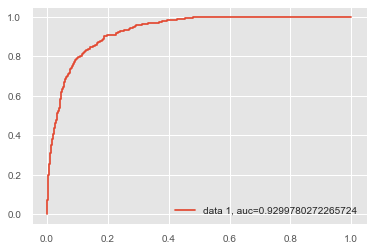

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3158
           1       0.64      0.70      0.67       541

    accuracy                           0.90      3699
   macro avg       0.79      0.82      0.80      3699
weighted avg       0.90      0.90      0.90      3699

Accuracy_svc: 0.8988915923222492


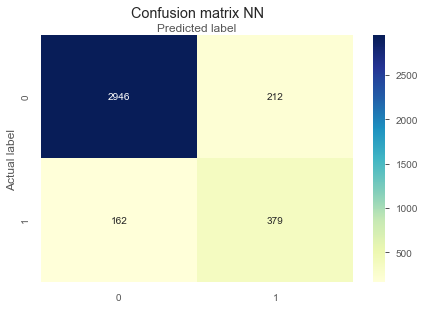

In [165]:
###4. Step 4: Assess the Model
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test

print("MLP score is",mlp.score(X_test,y_test))

# Accuracy for y NN
#print("y Accuracy NN:",metrics.accuracy_score(y_test, y_XGB_pred))
#print("")

###4. Step 4: Assess the Model
print("Accuracy_nn:",metrics.accuracy_score(y_test, y_pred_nn))
cnf_matrix_nn = metrics.confusion_matrix(y_test, y_pred_nn)

print(cnf_matrix_nn)

# Plot AOC
y_pred_proba_nn = mlp.predict_proba(X_test)[::,1]
fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
plt.legend(loc=4)
plt.show()


class_names_nn=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks_nn = np.arange(len(class_names_nn))
plt.xticks(tick_marks_nn, class_names_nn)
plt.yticks(tick_marks_nn, class_names_nn)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix NN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_nn))
print("Accuracy_svc:",metrics.accuracy_score(y_test, y_pred_nn))

#Plot AOC
# y_pred_proba_nn = mlp.predict_proba(X_test)[::,1]
# fpr_nn, tpr_nn, _ = metrics.roc_curve(y_test,  y_pred_proba_nn)
# auc_nn = metrics.roc_auc_score(y_test, y_pred_proba_nn)
# plt.plot(fpr_nn,tpr_nn,label="data 1, auc="+str(auc_nn))
# plt.legend(loc=4)
# plt.show()

In [166]:
# # Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [167]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

In [ ]:
#SOUNDS LIKE NEED TO USE SOMETHING LIKE "KERAS"? SEE HERE: https://urldefense.com/v3/__https://towardsdatascience.com/simple-guide-to-hyperparameter-tuning-in-neural-networks-3fe03dad8594*5Cn__;JQ!!KIFmrYtlezdzESbnm_I!UCnvV89lnf4zyYniQ1tmp0cEqfro80T-cjcfwd7vRwyp_8aShQmgOyEKh8XH9GthAmgdQtSt0sMrPPg$ #IF WE DO...IT SEEMS LIKE ONLY THING USED IN GRID SEARCH IS "INIT_MODE" FOR WEIGHT INITIALIZATIONS
# # PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 

# #Add in GridSearchCV
# from sklearn.model_selection import GridSearchCV

# #Define the grid
# dual=[True,False]
# max_iter=[100,110,120,130,140]
# param_grid = dict(dual=dual,max_iter=max_iter)

# #Run the grid search
# import time

# lr = LogisticRegression(penalty='l2')
# grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 10, n_jobs=-1)

# start_time = time.time()
# grid_result = grid.fit(X, y)
# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# #The below is for execution time - not important for us right now, so commented out
# # print("Execution time: " + str((time.time() - start_time)) + ' ms')

## Logistic Regression Model

>   <b> Accuracy: </b> 89%
<br><b> AUC: </b> 87%
<br><b> Next Steps: </b> Additional parameter tuning


In [168]:
#Build the model
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_LR_pred=logreg.predict(X_test)

In [169]:
# import the metrics class for the Confusion Matrix
from sklearn import metrics
cnf_matrix_LogR = metrics.confusion_matrix(y_test, y_LR_pred)
cnf_matrix_LogR

array([[2952,  206],
       [ 189,  352]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

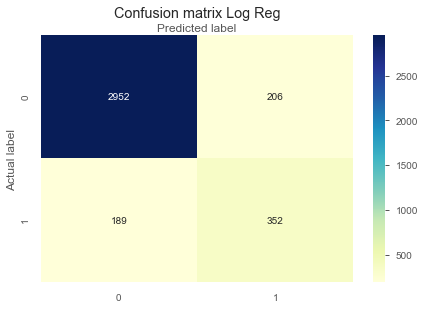

In [170]:
# Visualizing the Confusion Matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogR), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Log Reg', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

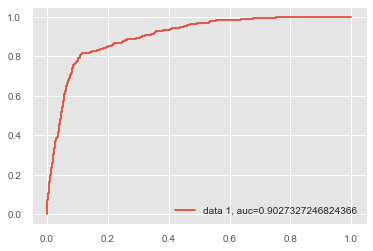

In [171]:
# ROC Curve
y_LR_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_test,  y_LR_pred_proba)
auc_LR = metrics.roc_auc_score(y_test, y_LR_pred_proba)
plt.plot(fpr_LR,tpr_LR,label="data 1, auc="+str(auc_LR))
plt.legend(loc=4)
plt.show()

In [173]:
print("Accuracy:",metrics.accuracy_score(y_test, y_LR_pred))
print("Precision:",metrics.precision_score(y_test, y_LR_pred))
print("Recall:",metrics.recall_score(y_test, y_LR_pred))
#Can use classification report to assess model adequacy, too
print(metrics.classification_report(y_test, y_LR_pred, labels=class_names))

Accuracy: 0.8932143822654771
Precision: 0.6308243727598566
Recall: 0.6506469500924215
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3158
           1       0.63      0.65      0.64       541

    accuracy                           0.89      3699
   macro avg       0.79      0.79      0.79      3699
weighted avg       0.89      0.89      0.89      3699



In [82]:
#90.3% accuracy 

In [83]:
# # Code for feature selection using scikit-learn
# # import the package
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(X_train,y_train)

In [84]:
# import pandas as pd
# feature_imp = pd.Series(clf.feature_importances_,index=y_test).sort_values(ascending=False)
# feature_imp

In [ ]:
# PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 

#Add in GridSearchCV
from sklearn.model_selection import GridSearchCV

#Define the grid
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

#Run the grid search
import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 10, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#The below is for execution time - not important for us right now, so commented out
# print("Execution time: " + str((time.time() - start_time)) + ' ms')

## K-Means Model

In [174]:
#important packages

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline

In [175]:
X_kmeans = np.array(X_train)
y_kmeans = np.array(y_train)

In [176]:
# Build the model

# load the model
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto') # 2 clusters, sale or no sale
kmeans.fit(X_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [177]:
# Predictions
correct = 0
for i in range(len(X_kmeans)):
    predict_me = np.array(X_kmeans[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y_kmeans[i]:
        correct += 1

print(correct/len(X_kmeans))

0.12628895840574672


In [ ]:
#DIDN'T WE DECIDE NOT TO DO FOR KMEANS?
# # PARAMETER OPTIMIZATION CODE USING GRID SEARCH: 

# #Add in GridSearchCV
# from sklearn.model_selection import GridSearchCV

# #Define the grid
# dual=[True,False]
# max_iter=[100,110,120,130,140]
# param_grid = dict(dual=dual,max_iter=max_iter)

# #Run the grid search
# import time

# lr = LogisticRegression(penalty='l2')
# grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 10, n_jobs=-1)

# start_time = time.time()
# grid_result = grid.fit(X, y)
# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# #The below is for execution time - not important for us right now, so commented out
# # print("Execution time: " + str((time.time() - start_time)) + ' ms')